# <center> Social Network Analysis: Marvel </center>

## 1. Setting-up Environment

In [1]:
from igraph import *
import cairo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx import closeness_centrality, reciprocity, overall_reciprocity,transitivity, diameter, average_clustering, betweenness_centrality

In [2]:
heroes = pd.read_csv('hero-network.csv')
edges = pd.read_csv('edges_heroes.csv')

In [3]:
heroes.head()

,from,to
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


## 2. Creating Weights

In [4]:
df_w = heroes.groupby(['from',"to "]).size().reset_index(name='weight')
heroes_w = df_w.sort_values(by = "weight", ascending = False).reset_index().drop(['index'],axis=1)
heroes_w

,from,to,weight
0,PATRIOT/JEFF MACE,PATRIOT/JEFF MACE,1275
1,PATRIOT/JEFF MACE,MISS AMERICA/MADELIN,1267
2,MISS AMERICA/MADELIN,MISS AMERICA/MADELIN,672
3,MISS AMERICA/MADELIN,PATRIOT/JEFF MACE,627
4,THING/BENJAMIN J. GR,HUMAN TORCH/JOHNNY S,382
...,...,...,...
224176,ITZAMNA,KARNAK [INHUMAN],1
224177,ITZAMNA,MEPHISTO,1
224178,ITZAMNA,NAMORITA/NITA PRENTI,1
224179,ITZAMNA,NEBULA,1


## 2. Eliminating Duplicates

In [5]:
Df = df_w.loc[df_w["from"] != df_w["to "], ]
Df.sort_values(by='weight', ascending= False)

,from,to,weight
142513,PATRIOT/JEFF MACE,MISS AMERICA/MADELIN,1267
124772,MISS AMERICA/MADELIN,PATRIOT/JEFF MACE,627
196026,THING/BENJAMIN J. GR,HUMAN TORCH/JOHNNY S,382
85445,HUMAN TORCH/JOHNNY S,MR. FANTASTIC/REED R,366
196250,THING/BENJAMIN J. GR,MR. FANTASTIC/REED R,365
...,...,...,...
92453,ITZAMNA,MEPHISTO,1
92454,ITZAMNA,NAMORITA/NITA PRENTI,1
92455,ITZAMNA,NEBULA,1
92456,ITZAMNA,QUASAR III/WENDELL V,1


In [6]:
edges.head()

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


## 3. Eliminating heroes with few appearances

In [7]:
common = edges['hero'].value_counts()
common_heroes = common[common > 20].index

In [8]:
common_heroes.value_counts()

BANNER, BETTY ROSS T    1
SATAN/MARDU KURIOS      1
WALTERS, SHERIFF MOR    1
STACY, GWEN             1
JARVIS, EDWIN           1
                       ..
THUNDERSTRIKE/ERIC K    1
LOCKHEED                1
SURTUR                  1
PROWLER/HOBIE BROWN     1
X-MAN/NATHAN GREY       1
Length: 751, dtype: int64

In [9]:
len(common)

6439

In [10]:
M = Df[Df['from'].isin(common_heroes)]
M_df = M[M['to '].isin(common_heroes)]
M_df = M_df.reset_index().drop(['index'],axis=1)
M_df.sort_values(by='weight', ascending= False)

,from,to,weight
48446,THING/BENJAMIN J. GR,HUMAN TORCH/JOHNNY S,382
21132,HUMAN TORCH/JOHNNY S,MR. FANTASTIC/REED R,366
48535,THING/BENJAMIN J. GR,MR. FANTASTIC/REED R,365
21249,HUMAN TORCH/JOHNNY S,THING/BENJAMIN J. GR,362
31851,MR. FANTASTIC/REED R,HUMAN TORCH/JOHNNY S,347
...,...,...,...
35717,PHOENIX III/RACHEL S,ANGEL/WARREN KENNETH,1
35716,PHOENIX III/RACHEL S,ABSORBING MAN/CARL C,1
35715,PHOENIX III/RACHEL S,ABOMINATION/EMIL BLO,1
35714,PHOENIX II,"YASHIDA, MARIKO",1


In [11]:
len(M_df)

55669

In [12]:
M_df['to '].nunique()

702

In [13]:
g1 = nx.from_pandas_edgelist(M_df,source = 'from', target = 'to ')


## 4. Properties

### a) Degrees

In [14]:
nxdeg = pd.DataFrame(g1.degree())
nxdeg.sort_values(by = 1,ascending = False)

,0,1
62,CAPTAIN AMERICA,577
108,MR. FANTASTIC/REED R,509
87,HUMAN TORCH/JOHNNY S,495
131,THING/BENJAMIN J. GR,492
45,THOR/DR. DONALD BLAK,486
...,...,...
696,"SUEE, FAH LO",7
653,ICE-MAN | MUTANT X-V,6
652,BRUTE | MUTANT X-VER,6
555,"ARCHER, ULYSSES SAMS",4


<AxesSubplot:xlabel='1'>

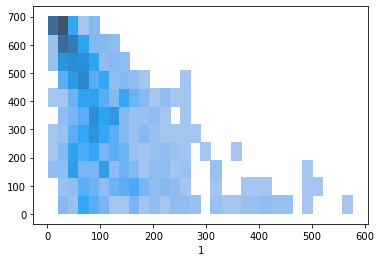

In [15]:
sns.histplot(nxdeg, x= nxdeg[1],y = nxdeg.index)

### b) Closeness Centrality

In [16]:
closeness_vec = closeness_centrality(g1)
closeness_df = pd.DataFrame([closeness_vec]).transpose()

In [17]:
closeness_df

,0
ABOMINATION/EMIL BLO,0.540062
ANGEL/WARREN KENNETH,0.708081
ANT-MAN/DR. HENRY J.,0.703815
ATALANTA,0.508339
"BANNER, BETTY ROSS T",0.560800
...,...
"WU, LEIKO",0.487144
SHALLA BAL II,0.477846
KILLRAVEN/JONATHAN R,0.430854
"ZAPPER, DAN",0.437851


<AxesSubplot:xlabel='0'>

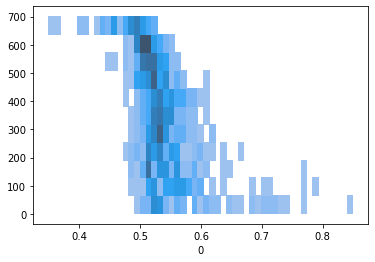

In [18]:
sns.histplot(closeness_df, x= closeness_df[0],y = nxdeg.index)

### c) Betweenness Centrality

In [19]:
between_vec = betweenness_centrality(g1)
between_df = pd.DataFrame([between_vec]).transpose()

In [20]:
between_df

,0
ABOMINATION/EMIL BLO,0.000423
ANGEL/WARREN KENNETH,0.013641
ANT-MAN/DR. HENRY J.,0.014591
ATALANTA,0.000021
"BANNER, BETTY ROSS T",0.001020
...,...
"WU, LEIKO",0.000472
SHALLA BAL II,0.000002
KILLRAVEN/JONATHAN R,0.000000
"ZAPPER, DAN",0.000004


<AxesSubplot:xlabel='0'>

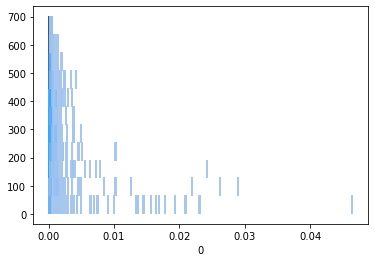

In [21]:
sns.histplot(between_df, x= between_df[0],y = nxdeg.index)

### d) Dataframe with node properties

In [22]:
names = list(nxdeg[0])

In [23]:
data = {'name':names,'degrees':list(nxdeg[1]),'closeness':list(closeness_df[0]),'betweenness':list(between_df[0])}

In [24]:
properties_df = pd.DataFrame(data)

In [25]:
properties_df.head(10)

,name,degrees,closeness,betweenness
0,ABOMINATION/EMIL BLO,106,0.540062,0.000423
1,ANGEL/WARREN KENNETH,412,0.708081,0.013641
2,ANT-MAN/DR. HENRY J.,406,0.703815,0.014591
3,ATALANTA,35,0.508339,0.000021
4,"BANNER, BETTY ROSS T",153,0.560800,0.001020
5,BEAST/HENRY &HANK& P,459,0.743372,0.020897
6,CALLISTO,100,0.531061,0.000300
7,COLOSSUS II/PETER RA,385,0.688605,0.010077
8,"CUSHING, KATE",88,0.531866,0.000353
9,CYCLOPS/SCOTT SUMMER,427,0.718974,0.015574


### e) Reciprocity UDF (Not used because graph is undirected)

In [26]:
 def reciprocity1(G, nodes=None):
        
        if nodes is None:
            return overall_reciprocity(G)

        # If `nodes` represents a single node in the graph, return only its
        # reciprocity.
        if nodes in G:
            reciprocity = next(_reciprocity_iter(G, nodes))[1]
        if reciprocity is None:
            raise NetworkXError("Not defined for isolated nodes.")
        else:
            return reciprocity

### f) Transitivity

In [27]:
nx.transitivity(g1)

0.39920042562894276

### g) Diameter

In [28]:
nx.diameter(g1)

4

### h) Average path length

In [29]:
nx.average_shortest_path_length(g1)

1.8774441071160044

### i) Clustering Coefficient

In [30]:
nx.average_clustering(g1)

0.5559577672025203

# NETWORK MODELS

We will simulate different network models in order to compare them to the Marvel Universe (MU) actual network and ultimately identify specific characteristics of the MU network that are present in the simulated models. This will not only help us understand what essential components define the MU network, but also help us compare it with real world networks such as the actors network we have seen in class.

## 1. Erdös-Rényi Random Graph Model (pure randomdess)

We begin by simulating the most random network model to treat it as a baseline for further analysis.

In [31]:
import random
from scipy.stats import bernoulli
%matplotlib inline

In [32]:
def erdos(n,p):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1,node2)
    return G

In [33]:
alternate_uni = erdos(M_df['from'].nunique(),0.02)

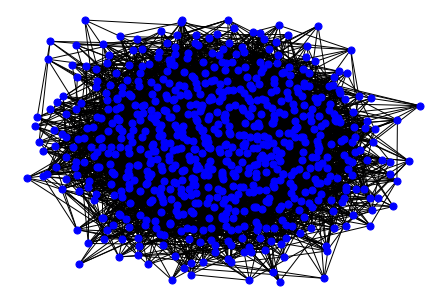

In [34]:
nx.draw(alternate_uni, node_size = 50, node_color = 'blue')

## 2. Regular Network Model (pure predictability)

This is the polar opposite to the random network model. Here, each node has the same number of connections, but these connections are with their k "neighbors" only (in the ER random model each is connected randomly, not necessaritly to its neighbors).

Regular networks have a high distance and a high clustering coefficient, whereas random networks have a low distance and a low clustering coefficient. They are also almost infinitely transitive.

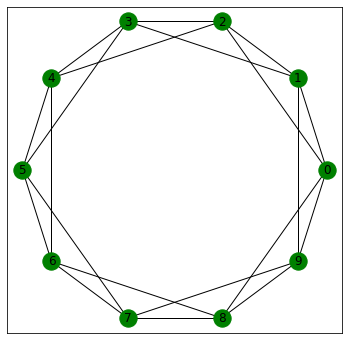

In [35]:
# A regular graph looks like this. Notice that p = 0.
G_reg = nx.watts_strogatz_graph(n = 10, k = 4, p = 0)
pos = nx.circular_layout(G_reg)
  
plt.figure(figsize = (6, 6))
nx.draw_networkx(G_reg, pos, node_color = 'green')

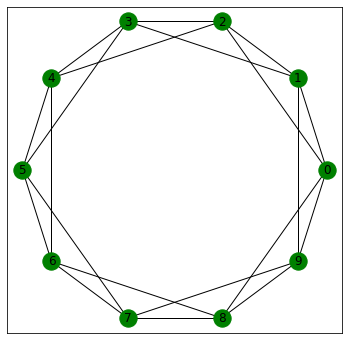

In [36]:
# A regular graph looks like this. Notice that p = 0.
G_reg = nx.watts_strogatz_graph(n = 10, k = 4, p = 0)
pos = nx.circular_layout(G_reg)
  
plt.figure(figsize = (6, 6))
nx.draw_networkx(G_reg, pos, node_color = 'green')

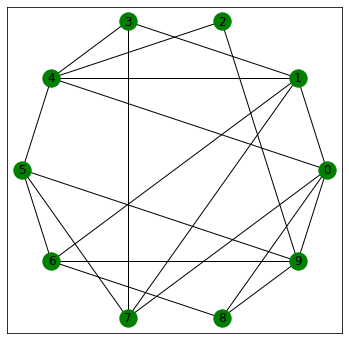

In [37]:
# A small world graph looks like this. Notice that p = 0.6.
G_ws = nx.watts_strogatz_graph(n = 10, k = 4, p = 0.7)
pos = nx.circular_layout(G_ws)
  
plt.figure(figsize = (6, 6))
nx.draw_networkx(G_ws, pos, node_color = 'green')

## 3. Small World Model (Strogatz and Watts)

Also called the Watts-Strogats model, this model is the middle point between the completely random model and the completely predictable regular model, as it introduces a probabilistic component to the ER random model. Basically, the probability that a node breaks ties with one of its k neighbors and gets connected to a distant node is higher than 0 (parameter p of the function above/below).

This model behaves more like a real social network like that of the actors:
- low distance
- high clustering coefficient

The point of this is that a network just needs to have a few "distant" or "long" links to have a low distance (APL). This means that a low APL and a high clustering coefficient can and DO coexist in the real world.

This model, however, does not replicate real-world degree distribution.

In [38]:
from smallworld.draw import draw_network
from smallworld import get_smallworld_graph

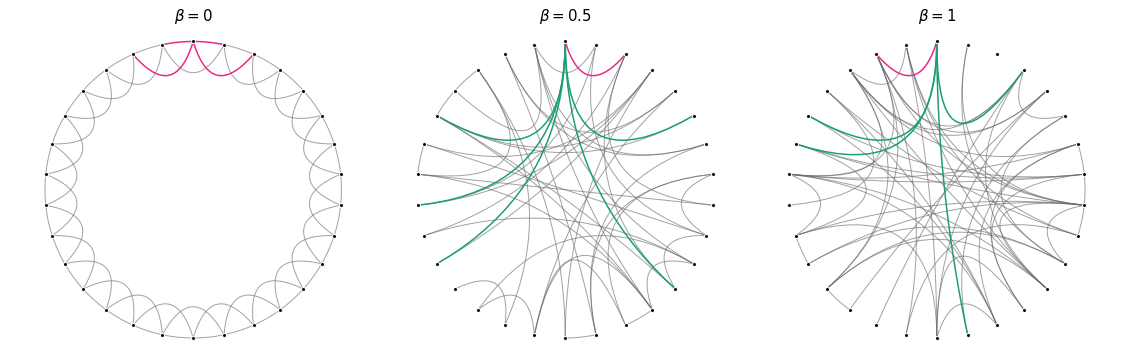

In [39]:
# define network parameters
N = 30
k_over_2 = 2
betas = [0, 0.5, 1.0]
labels = [ r'$\beta=0$', r'$\beta=0.5$', r'$\beta=1$']

focal_node = 0

fig, ax = plt.subplots(1,3,figsize=(20,6))


# scan beta values
for ib, beta in enumerate(betas):

    # generate small-world graphs and draw
    G = get_smallworld_graph(N, k_over_2, beta)
    draw_network(G,k_over_2,focal_node=focal_node,ax=ax[ib])

    ax[ib].set_title(labels[ib],fontsize=15)

# show
plt.subplots_adjust(wspace=0)
plt.show()

## 4. Preferential Attachment Model ("the rich getting richer")

This model tries to replicate the popularity phenomenon in social networks. The reason why the "rich get richer". The more popular a node is, the more likely it is to become even more popular. This creates a convergence in degree distribution that ends up in a power-law shape (as the convergence is exponential: a snowball effect).

Main idea of the iterative process as nodes are added one by one:

1. Take a random graph with n0 nodes and connect them randomly with a condition that each has at least 1 link.
2. At each time we add a new node n which is less or equal to n0 links that will connect the new node to n nodes already in the network.
3. Now the probability that a node connects to a particular node will depend on its degree. (Preferential Attachment = convergence = snow ball effect).

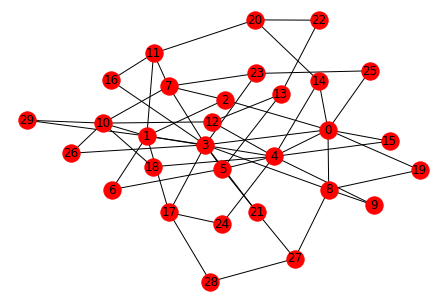

In [40]:
G_ba1= nx.barabasi_albert_graph(n=30, m=2, seed=14)
nx.draw(G_ba1, with_labels=True, node_color='red')
plt.show()

# n = number of nodes
# m = number of edges to attach from a new node to existing nodes. A measure of the importance of popularity in the network.

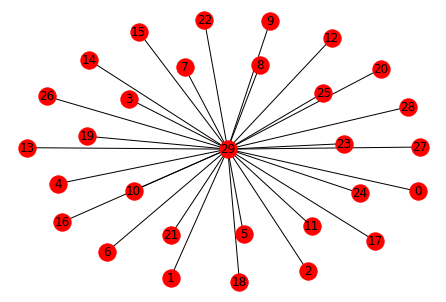

In [41]:
G_ba2= nx.barabasi_albert_graph(n=30, m=29, seed=14)
nx.draw(G_ba2, with_labels=True, node_color='red')
plt.show()

# n = number of nodes
# m = number of edges to attach from a new node to existing nodes. A measure of the importance of popularity in the network.

## Community Detection Algorithm

In [42]:
from networkx.algorithms import community

In [43]:
from networkx.algorithms.community import greedy_modularity_communities
c = greedy_modularity_communities(g1)


In [44]:
dfc = pd.DataFrame(c)

In [45]:
group_0 = dfc.iloc[0]

In [46]:
group_1 = dfc.iloc[1]

In [47]:
group_2 = dfc.iloc[2]

In [48]:
nodes0 = pd.DataFrame(group_0)

In [49]:
nodes1 = pd.DataFrame(group_1)
nodes1 = nodes1.dropna()

In [50]:
nodes2 = pd.DataFrame(group_2)
nodes2 = nodes2.dropna()

In [51]:
data = {'community0':group_0,'community1':group_1,'community2':group_2}

In [52]:
community_df = pd.DataFrame(data)

In [53]:
community_df

,community0,community1,community2
0,GHAUR [DEVIANT],"POWER, DR. JIM",ARRANGER/
1,CENTURY,"STUART, DR. ALISTAIR","TRAINER, DR. SEWARD"
2,"ADAMS, NICOLE NIKKI",SKIDS/SALLY BLEVINS,"PARKER, MAY"
3,"RORY, RICHARD",EXPEDITER II/ZOE CUL,"GRANT, GLORIA GLORY"
4,"KINCAID, DR. JANE FO",COLOSSUS II/PETER RA,"NELSON, DEBBIE HARRI"
...,...,...,...
347,EGO,None,None
348,SPITFIRE/LADY JACQUE,None,None
349,MOCKINGBIRD/DR. BARB,None,None
350,CLOWN/CRAFTY ELIOT F,None,None


In [54]:
C = M_df[M_df['from'].isin(group_0)]
C_df = C[C['to '].isin(group_0)]
C_df = C_df.reset_index().drop(['index'],axis=1)

In [55]:
com0 = nx.from_pandas_edgelist(C_df,source = 'from', target = 'to ')

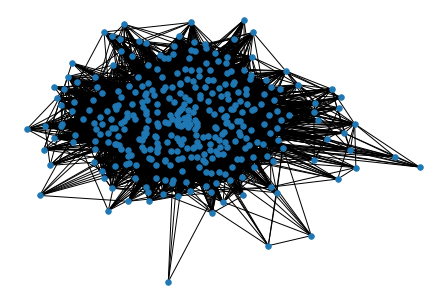

<Figure size 864x864 with 0 Axes>

In [56]:
nx.draw(com0, node_size = 30)
plt.figure(3,figsize=(12,12)) 
plt.show()

In [57]:
C1 = M_df[M_df['from'].isin(nodes1[1])]
C1_df = C1[C1['to '].isin(nodes1[1])]
C1_df = C1_df.reset_index().drop(['index'],axis=1)

In [58]:
com1 = nx.from_pandas_edgelist(C1_df,source = 'from', target = 'to ')

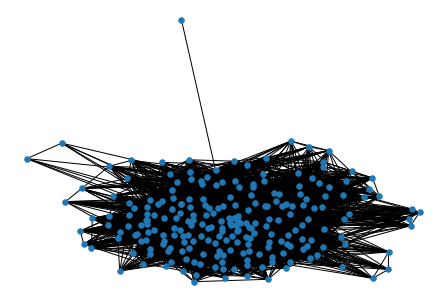

In [59]:
nx.draw(com1, node_size = 30)

In [60]:
C2 = M_df[M_df['from'].isin(nodes2[2])]
C2_df = C2[C2['to '].isin(nodes2[2])]
C2_df = C2_df.reset_index().drop(['index'],axis=1)


In [61]:
com2 = nx.from_pandas_edgelist(C2_df,source = 'from', target = 'to ')

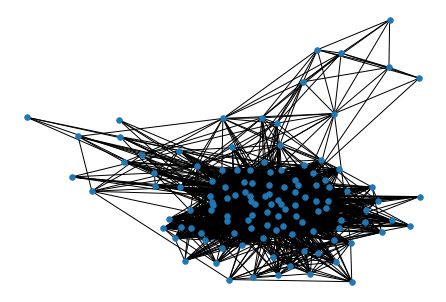

In [62]:
nx.draw(com2, node_size = 30)

# Information diffusion

In [63]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

# Model selection
model = ep.IndependentCascadesModel(g1)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.1)

# Setting the edge parameters
threshold = 0.1
for e in g1.edges():
    config.add_edge_configuration("threshold", e, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200, progress_bar=True)

100%|███████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1728.84it/s]


In [64]:
# Model selection
model = ep.IndependentCascadesModel(g1)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.1) # infecting 10% of the heroes on iteration 0

# Setting the edge parameters
threshold = 0.1
for e in g1.edges():
    config.add_edge_configuration("threshold", e, threshold) # 10% chance of infection with every of his neighbors (not so infectious)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200, progress_bar=True)

it = pd.DataFrame(iterations)
it.head(10)

100%|███████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1743.29it/s]


,iteration,status,node_count,status_delta
0,0,"{'ABOMINATION/EMIL BLO': 1, 'ANGEL/WARREN KENN...","{0: 632, 1: 70, 2: 0}","{0: 0, 1: 0, 2: 0}"
1,1,"{'ABOMINATION/EMIL BLO': 2, 'ANGEL/WARREN KENN...","{0: 266, 1: 366, 2: 70}","{0: -366, 1: 296, 2: 70}"
2,2,"{'ANGEL/WARREN KENNETH': 2, 'ANT-MAN/DR. HENRY...","{0: 28, 1: 238, 2: 436}","{0: -238, 1: -128, 2: 366}"
3,3,"{'ATALANTA': 2, 'BANNER, BETTY ROSS T': 2, 'HE...","{0: 17, 1: 11, 2: 674}","{0: -11, 1: -227, 2: 238}"
4,4,"{'HECTOR II': 2, 'OZYMANDIAS': 2, 'ANCIENT ONE...","{0: 17, 1: 0, 2: 685}","{0: 0, 1: -11, 2: 11}"
5,5,{},"{0: 17, 1: 0, 2: 685}","{0: 0, 1: 0, 2: 0}"
6,6,{},"{0: 17, 1: 0, 2: 685}","{0: 0, 1: 0, 2: 0}"
7,7,{},"{0: 17, 1: 0, 2: 685}","{0: 0, 1: 0, 2: 0}"
8,8,{},"{0: 17, 1: 0, 2: 685}","{0: 0, 1: 0, 2: 0}"
9,9,{},"{0: 17, 1: 0, 2: 685}","{0: 0, 1: 0, 2: 0}"


In [65]:
import random

def ic(G, s):
  print(s)
  jst_inf = list(s)
  infected = list(s)
  while(1):
    print(jst_inf, infected)
    if len(jst_inf) == 0:
      print(infected)
      return infected
    tmp=[]
    for each in jst_inf:
      for each1 in G.neighbors(each):
        r=random.uniform(0,1)
        if r<0.5 and each1 not in infected and each1 not in tmp:
          tmp.append(each1)
      for each in tmp:
        infected.append(each)
      jst_inf=list(tmp)

In [ ]:
# The output of this cell is too heavy but it runs !
s = ['THING/BENJAMIN J. GR']
ic(g1, s)